In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-11-01 03:19:00.894589: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-01 03:19:02.815544: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 03:19:02.816490: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-11-01 03:19:03.327647: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 03:19:03.330145: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

In [9]:
last_key

10658

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13454, 512, 512, 1) (13454, 512, 512, 1) (3312, 512, 512, 1) (3312, 512, 512, 1)


In [11]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

In [12]:
train_gen = C.Helper.augment_2(X_train_set, y_train_set)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [13]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)

(2, 512, 512, 1) (2, 512, 512, 1)


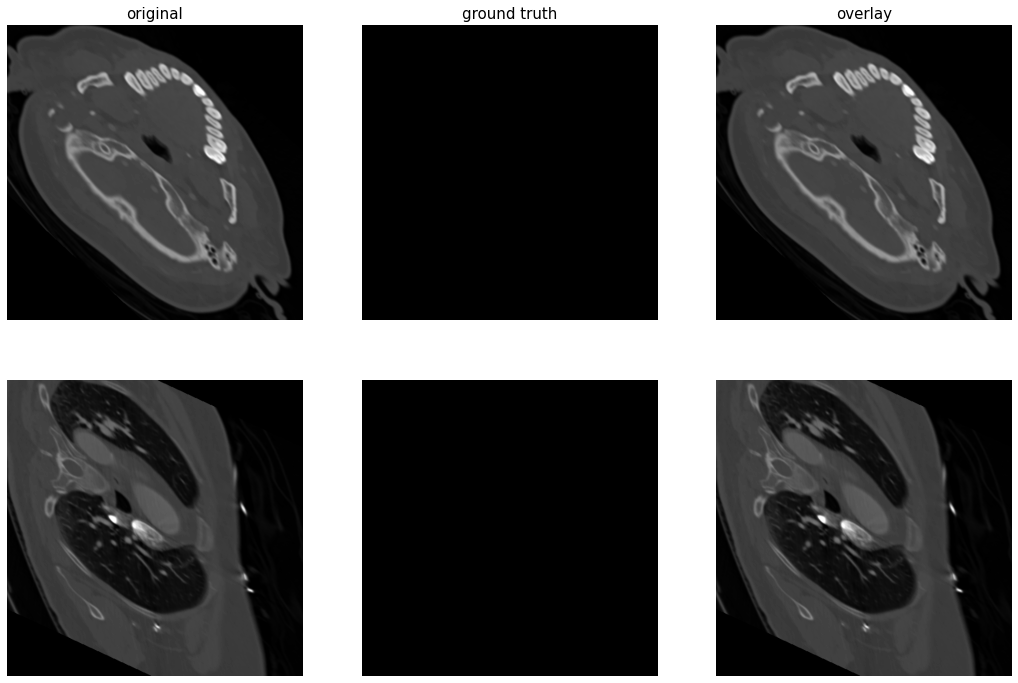

In [14]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-11-01 03:25:24.881561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 03:25:24.884130: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 03:25:24.893957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-11-01 03:25:24.896979: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 03:25:24.899433: I tensorflow/core

In [16]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, steps_per_epoch=len(X_train) // 2,epochs=50)

2023-11-01 03:25:25.699020: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-01 03:25:25.716752: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/50


2023-11-01 03:25:26.987525: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-01 03:25:27.591578: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-01 03:25:28.245565: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-01 03:25:28.245586: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-01 03:25:28.245647: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-01 03:25:28.295837: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-01 03:25:28.994513: I tensorflow/stream_exec

5329/5329 [==============================] - 549s 102ms/step - loss: 6649.0796 - iou: 0.4909 - iou_thresholded: 0.9210 - val_loss: 1.1669e-04 - val_iou: 0.0161 - val_iou_thresholded: 0.8420
Epoch 2/50
5329/5329 [==============================] - 526s 99ms/step - loss: 0.0320 - iou: 0.3745 - iou_thresholded: 0.9172 - val_loss: 8.3823e-05 - val_iou: 0.0174 - val_iou_thresholded: 0.8420
Epoch 3/50
5329/5329 [==============================] - 526s 99ms/step - loss: 1.0823e-04 - iou: 0.4133 - iou_thresholded: 0.9227 - val_loss: 8.5488e-05 - val_iou: 0.1052 - val_iou_thresholded: 0.8420
Epoch 4/50
5329/5329 [==============================] - 526s 99ms/step - loss: 9.9738e-05 - iou: 0.3859 - iou_thresholded: 0.9241 - val_loss: 1.3134e-04 - val_iou: 0.0022 - val_iou_thresholded: 0.8420
Epoch 5/50
5329/5329 [==============================] - 526s 99ms/step - loss: 9.2679e-05 - iou: 0.3350 - iou_thresholded: 0.9235 - val_loss: 3.1362e-04 - val_iou: 0.0851 - val_iou_thresholded: 0.8420
Epoch 6/50

Epoch 42/50
5329/5329 [==============================] - 525s 99ms/step - loss: 1.0399e-04 - iou: 0.1794 - iou_thresholded: 0.9243 - val_loss: 8.8715e-05 - val_iou: 0.0131 - val_iou_thresholded: 0.8420
Epoch 43/50
5329/5329 [==============================] - 526s 99ms/step - loss: 1.0422e-04 - iou: 0.1811 - iou_thresholded: 0.9249 - val_loss: 8.8732e-05 - val_iou: 0.0130 - val_iou_thresholded: 0.8420
Epoch 44/50
5329/5329 [==============================] - 526s 99ms/step - loss: 1.0327e-04 - iou: 0.1779 - iou_thresholded: 0.9239 - val_loss: 8.8715e-05 - val_iou: 0.0131 - val_iou_thresholded: 0.8420
Epoch 45/50
5329/5329 [==============================] - 526s 99ms/step - loss: 1.0286e-04 - iou: 0.1782 - iou_thresholded: 0.9234 - val_loss: 8.8692e-05 - val_iou: 0.0134 - val_iou_thresholded: 0.8420
Epoch 46/50
5329/5329 [==============================] - 526s 99ms/step - loss: 1.0264e-04 - iou: 0.1812 - iou_thresholded: 0.9233 - val_loss: 8.8703e-05 - val_iou: 0.0133 - val_iou_thresholde

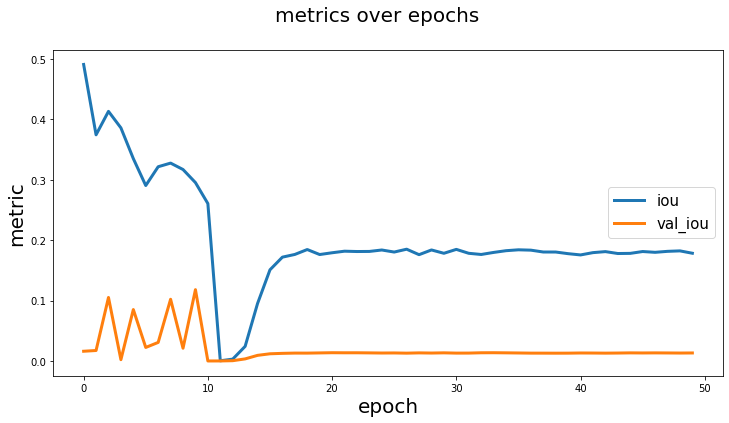

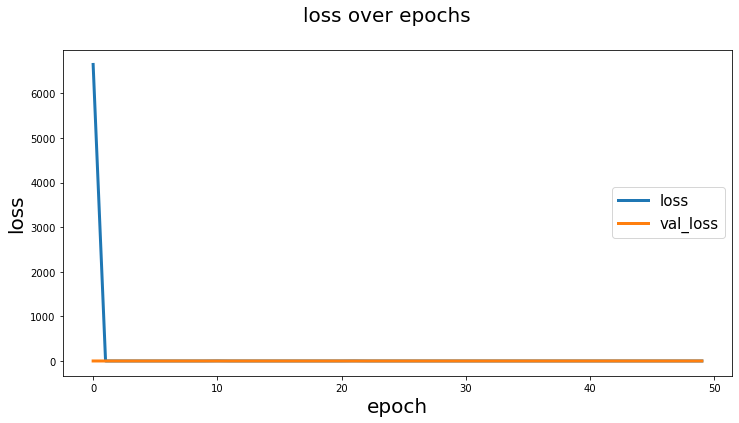

In [17]:
C.Helper.visualize_graph(history)

In [18]:
y_pred = C.Helper.prediction(X_test, model)

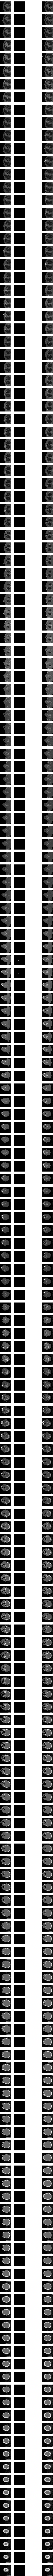

In [19]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [20]:
C.Helper.evaluate(X_test, y_test, model)

104/104 [==============================] - 23s 222ms/step - loss: 9.2391e-05 - iou: 0.0130 - iou_thresholded: 0.8012


In [21]:
# feed full test full